In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation,Dropout
from tensorflow.keras.layers import Conv1D,MaxPooling1D,GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
from numpy import array
import pandas as pd
import nltk
from tensorflow.keras.layers import LSTM

In [2]:
train_data=pd.read_csv("train.csv")
train=train_data[:25000]
train.to_csv("train_data.csv")
train.head()

,Context,Utterance,Label
0,i think we could import the old comments via r...,basically each xfree86 upload will NOT force u...,1.0
1,I'm not suggesting all - only the ones you mod...,sorry __eou__ i thought it was ubuntu related....,0.0
2,afternoon all __eou__ not entirely related to ...,"Yep. __eou__ oh, okay. I wondered what happene...",0.0
3,interesting __eou__ grub-install worked with /...,thats the one __eou__,1.0
4,and because Python gives Mark a woody __eou__ ...,(i thought someone was going to make a joke ab...,1.0


In [3]:
test_data=pd.read_csv("test.csv")
test=test_data[:5000]
test.to_csv("test_data.csv")
test.head()

,Context,Ground Truth Utterance,Distractor_0,Distractor_1,Distractor_2,Distractor_3,Distractor_4,Distractor_5,Distractor_6,Distractor_7,Distractor_8
0,anyone knows why my stock oneiric exports env ...,nice thanks! __eou__,"wrong channel for it, but check efnet.org, uno...","every time the kernel changes, you will lose v...",ok __eou__,!nomodeset > acer __eou__ I'm assuming it is a...,http://www.ubuntu.com/project/about-ubuntu/der...,thx __eou__ unfortunately the program isn't in...,how can I check? By doing a recovery for testi...,my humble apologies __eou__,#ubuntu-offtopic __eou__
1,i set up my hd such that i have to type a pass...,"so you dont know, ok, anyone else? __eou__ you...","nmap is nice, but it wasn't what I was looking...",ok __eou__,cdrom worked fine on windows. __eou__ i dont ...,"ah yes, i have read return as rerun __eou__",hm? __eou__,"not the case, LTS is every other .04 release. ...",Pretty much __eou__,I used the one I downloaded from AMD __eou__,"ffmpeg is part of the package , quixotedon , a..."
2,im trying to use ubuntu on my macbook pro reti...,just wondering how it runs __eou__,"yes, that's what I did, exported it to a ""id_d...",nothing - i am talking about the question of m...,that should fix the fonts being too large __eou__,"okay, so hcitool echos back hci0 <mac address ...",I get to the menu with options such as 'try ub...,why do u need analyzer __eou__ it is a toy __e...,Cntrl-C may stop the command but it doesn't fi...,"if you're only going to run Ubuntu, just get a...",the ones which are not picked up at the moment...
3,no suggestions? __eou__ links? __eou__ how can...,you cant load anything via usb or cd when luks...,-p sorry... __eou__ nmap -p22 __eou__ It d...,i guess so i can't even launch it. __eou__,noted __eou__,rxvt-unicode is one __eou__,I tarred all of ~ __eou__,I tarred all of ~ __eou__,"I don't really know if I can help, but I was c...","that works just fine, thanks! __eou__",thank you __eou__
4,I just added a second usb printer but not sure...,i was setting it up under the printer configur...,i'd say the most commonly venue would be via L...,"the old hardy man page, http://manpages.ubuntu...",i'll give a try __eou__,"by the way, the url you posted for davfs is fr...",http://ubuntuforums.org/showthread.php?t=15498...,"So I load up putty gui, then what do I do? __e...","you should read error messages, it says 'are ...",waiting the college semester to close just to ...,I was calling myself a jerk. All I know is tha...


In [4]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['Context'] = train['Context'].str.lower().str.split()
train['Utterance']=train['Utterance'].str.lower().str.split()
train['Context']=train['Context'].apply(lambda x: [item for item in x if item not in stop])
train['Utterance']=train['Utterance'].apply(lambda x: [item for item in x if item not in stop])
test['Context'] = test['Context'].str.lower().str.split()
test['Ground Truth Utterance'] = test['Ground Truth Utterance'].str.lower().str.split()
test['Distractor_0'] = test['Distractor_0'].str.lower().str.split()
test['Distractor_1'] = test['Distractor_1'].str.lower().str.split()
test['Distractor_2'] = test['Distractor_2'].str.lower().str.split()
test['Distractor_3'] = test['Distractor_3'].str.lower().str.split()
test['Distractor_4'] = test['Distractor_4'].str.lower().str.split()
test['Distractor_5'] = test['Distractor_5'].str.lower().str.split()
test['Distractor_6'] = test['Distractor_6'].str.lower().str.split()
test['Distractor_7'] = test['Distractor_7'].str.lower().str.split()
test['Distractor_8'] = test['Distractor_8'].str.lower().str.split()
test['Context'] = test['Context'].apply(lambda x: [item for item in x if item not in stop])
test['Ground Truth Utterance'] = test['Ground Truth Utterance'].apply(lambda x: [item for item in x if item not in stop])
test['Distractor_0'] = test['Distractor_0'].apply(lambda x: [item for item in x if item not in stop])
test['Distractor_1'] = test['Distractor_1'].apply(lambda x: [item for item in x if item not in stop])
test['Distractor_2'] = test['Distractor_2'].apply(lambda x: [item for item in x if item not in stop])
test['Distractor_3'] = test['Distractor_3'].apply(lambda x: [item for item in x if item not in stop])
test['Distractor_4'] = test['Distractor_4'].apply(lambda x: [item for item in x if item not in stop])
test['Distractor_5'] = test['Distractor_5'].apply(lambda x: [item for item in x if item not in stop])
test['Distractor_6'] = test['Distractor_6'].apply(lambda x: [item for item in x if item not in stop])
test['Distractor_7'] = test['Distractor_7'].apply(lambda x: [item for item in x if item not in stop])
test['Distractor_8'] = test['Distractor_8'].apply(lambda x: [item for item in x if item not in stop])

<ipython-input-4-842cfad7821f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Context'] = train['Context'].str.lower().str.split()
<ipython-input-4-842cfad7821f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Utterance']=train['Utterance'].str.lower().str.split()
<ipython-input-4-842cfad7821f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

<ipython-input-4-842cfad7821f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Distractor_4'] = test['Distractor_4'].apply(lambda x: [item for item in x if item not in stop])
<ipython-input-4-842cfad7821f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Distractor_5'] = test['Distractor_5'].apply(lambda x: [item for item in x if item not in stop])
<ipython-input-4-842cfad7821f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [5]:
import string
def remove_punctuation(txt):
    txt_punctuate=[c for c in txt if c not in string.punctuation]
    return txt_punctuate
#train_data_context=train_data_context.apply(lambda x:remove_punctuation(x))
train['Context']=train['Context'].apply(lambda x:remove_punctuation(x))
train['Utterance']=train['Utterance'].apply(lambda x:remove_punctuation(x))
test['Context'] = test['Context'].apply(lambda x:remove_punctuation(x))
test['Ground Truth Utterance'] = test['Ground Truth Utterance'].apply(lambda x:remove_punctuation(x))
test['Distractor_0'] = test['Distractor_0'].apply(lambda x:remove_punctuation(x))
test['Distractor_1'] = test['Distractor_1'].apply(lambda x:remove_punctuation(x))
test['Distractor_2'] = test['Distractor_2'].apply(lambda x:remove_punctuation(x))
test['Distractor_3'] = test['Distractor_3'].apply(lambda x:remove_punctuation(x))
test['Distractor_4'] = test['Distractor_4'].apply(lambda x:remove_punctuation(x))
test['Distractor_5'] = test['Distractor_5'].apply(lambda x:remove_punctuation(x))
test['Distractor_6'] = test['Distractor_6'].apply(lambda x:remove_punctuation(x))
test['Distractor_7'] = test['Distractor_7'].apply(lambda x:remove_punctuation(x))
test['Distractor_8'] = test['Distractor_8'].apply(lambda x:remove_punctuation(x))


train_data_context=train['Context']
train_data_utter=train['Utterance']
test_context=test['Context']
test_ground_truth=test['Ground Truth Utterance']
test_distractor0=test['Distractor_0']
test_distractor1=test['Distractor_1']
test_distractor2=test['Distractor_2']
test_distractor3=test['Distractor_3']
test_distractor4=test['Distractor_4']
test_distractor5=test['Distractor_5']
test_distractor6=test['Distractor_6']
test_distractor7=test['Distractor_7']
test_distractor8=test['Distractor_8']

<ipython-input-5-ccf4c9cd3711>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Context']=train['Context'].apply(lambda x:remove_punctuation(x))
<ipython-input-5-ccf4c9cd3711>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Utterance']=train['Utterance'].apply(lambda x:remove_punctuation(x))
<ipython-input-5-ccf4c9cd3711>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [6]:
import re
def rmv_left(txt):
    txt_trim=[re.sub(r'[/.:,-]','',c) for c in txt]
    return txt_trim
train_data_context=train_data_context.apply(lambda x:rmv_left(x))
train_data_utter=train_data_utter.apply(lambda x:rmv_left(x))
test_context=test_context.apply(lambda x:rmv_left(x))
test_ground_truth=test_ground_truth.apply(lambda x:rmv_left(x))
test_distractor0=test_distractor0.apply(lambda x:rmv_left(x))
test_distractor1=test_distractor1.apply(lambda x:rmv_left(x))
test_distractor2=test_distractor2.apply(lambda x:rmv_left(x))
test_distractor3=test_distractor3.apply(lambda x:rmv_left(x))
test_distractor4=test_distractor4.apply(lambda x:rmv_left(x))
test_distractor5=test_distractor5.apply(lambda x:rmv_left(x))
test_distractor6=test_distractor6.apply(lambda x:rmv_left(x))
test_distractor7=test_distractor7.apply(lambda x:rmv_left(x))
test_distractor8=test_distractor8.apply(lambda x:rmv_left(x))

In [7]:
str1="\'s"
str2="\'m"
def remove_words(txt):
    txt_rem=[c for c in txt if c not in str2]
    return txt_rem
train_data_context=train_data_context.apply(lambda x:remove_words(x))
train_data_utter=train_data_utter.apply(lambda x:remove_words(x))
test_context=test_context.apply(lambda x:remove_words(x))
test_ground_truth=test_ground_truth.apply(lambda x:remove_words(x))
test_distractor0=test_distractor0.apply(lambda x:remove_words(x))
test_distractor1=test_distractor1.apply(lambda x:remove_words(x))
test_distractor2=test_distractor2.apply(lambda x:remove_words(x))
test_distractor3=test_distractor3.apply(lambda x:remove_words(x))
test_distractor4=test_distractor4.apply(lambda x:remove_words(x))
test_distractor5=test_distractor5.apply(lambda x:remove_words(x))
test_distractor6=test_distractor6.apply(lambda x:remove_words(x))
test_distractor7=test_distractor7.apply(lambda x:remove_words(x))
test_distractor8=test_distractor8.apply(lambda x:remove_words(x))

In [8]:
train['Label'].value_counts()

1.0    12539
0.0    12461
Name: Label, dtype: int64

In [9]:
train_data_context=train_data_context.tolist()
train_data_utter=train_data_utter.tolist()
test_context=test_context.tolist()
test_ground_truth=test_ground_truth.tolist()
test_distractor0=test_distractor0.tolist()
test_distractor1=test_distractor1.tolist()
test_distractor2=test_distractor2.tolist()
test_distractor3=test_distractor3.tolist()
test_distractor4=test_distractor4.tolist()
test_distractor5=test_distractor5.tolist()
test_distractor6=test_distractor6.tolist()
test_distractor7=test_distractor7.tolist()
test_distractor8=test_distractor8.tolist()
y=train['Label']

In [10]:
token=Tokenizer()#tokenizing    #for contexts
token.fit_on_texts(train_data_context+test_context)


In [11]:
token1=Tokenizer()    #tokenizing utterances
token1.fit_on_texts(train_data_utter+test_ground_truth+test_distractor0+test_distractor1+test_distractor2
                   +test_distractor3+test_distractor4+test_distractor5+test_distractor6+test_distractor7+test_distractor8)

In [12]:
vocab_size=len(token.word_index)+1   #no of unique words   and +1 is for padding   -------------contexts
print(vocab_size)
utter_size=len(token1.word_index)+1   #------responses 
utter_size

86362


46657

In [13]:
encode_text=token.texts_to_sequences(train_data_context)
encode_utter=token1.texts_to_sequences(train_data_utter)
encode_test_context=token.texts_to_sequences(test_context)
encode_test_ground_truth=token1.texts_to_sequences(test_ground_truth)
encode_test_distractor0=token1.texts_to_sequences(test_distractor0)
encode_test_distractor1=token1.texts_to_sequences(test_distractor1)
encode_test_distractor2=token1.texts_to_sequences(test_distractor2)
encode_test_distractor3=token1.texts_to_sequences(test_distractor3)
encode_test_distractor4=token1.texts_to_sequences(test_distractor4)
encode_test_distractor5=token1.texts_to_sequences(test_distractor5)
encode_test_distractor6=token1.texts_to_sequences(test_distractor6)
encode_test_distractor7=token1.texts_to_sequences(test_distractor7)
encode_test_distractor8=token1.texts_to_sequences(test_distractor8)

In [14]:
max_length=40
X=pad_sequences(encode_text,maxlen=max_length,padding='post')
Y=pad_sequences(encode_utter,maxlen=max_length,padding='post')
XC=pad_sequences(encode_test_context,maxlen=max_length,padding='post')
YG=pad_sequences(encode_test_ground_truth,maxlen=max_length,padding='post')
Y0=pad_sequences(encode_test_distractor0,maxlen=max_length,padding='post')
Y1=pad_sequences(encode_test_distractor1,maxlen=max_length,padding='post')
Y2=pad_sequences(encode_test_distractor2,maxlen=max_length,padding='post')
Y3=pad_sequences(encode_test_distractor3,maxlen=max_length,padding='post')
Y4=pad_sequences(encode_test_distractor4,maxlen=max_length,padding='post')
Y5=pad_sequences(encode_test_distractor5,maxlen=max_length,padding='post')
Y6=pad_sequences(encode_test_distractor6,maxlen=max_length,padding='post')
Y7=pad_sequences(encode_test_distractor7,maxlen=max_length,padding='post')
Y8=pad_sequences(encode_test_distractor8,maxlen=max_length,padding='post')

In [15]:
glove_vectors=dict()

In [16]:
%%time
file=open('glove.6B.300d.txt',encoding='utf-8')

for line in file:
    values=line.split()
    word=values[0]
    vectors=np.asarray(values[1:])
    glove_vectors[word]=vectors
    
file.close()

Wall time: 27.4 s


In [17]:
%%time
word_matrix=np.zeros((vocab_size,300))     #using glove vectors on contexts

for word,index in token.word_index.items():
    vectors=glove_vectors.get(word)
    if vectors is not None:
        word_matrix[index]=vectors
    

Wall time: 7.72 s


In [18]:
%%time
utter_matrix=np.zeros((utter_size,300))   #using glove on utterance   


for word,index in token1.word_index.items():
    vectors=glove_vectors.get(word)
    if vectors is not None:
        utter_matrix[index]=vectors

Wall time: 2.86 s


In [19]:
%%time
vec_size=300
lstm_output=300
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
model=Sequential()
context_embedding1=(Embedding(vocab_size,vec_size,input_length=max_length,weights=[word_matrix],trainable=False))
context_embedding=(LSTM(lstm_output))
sequence_1_input = Input(shape=(40,), dtype='int32')
embedded_sequences_1 = context_embedding1(sequence_1_input)
x1 = context_embedding(embedded_sequences_1)

Wall time: 3.59 s


In [20]:
%%time
vec1_size=300
lstm1_output=300

model1=Sequential()
utterance_embedding1=(Embedding(utter_size,vec1_size,input_length=max_length,weights=[utter_matrix],trainable=False))
utterance_embedding=(LSTM(lstm1_output))
sequence_2_input = Input(shape=(40,), dtype='int32')
embedded_sequences_2 = utterance_embedding1(sequence_2_input)
y1 = utterance_embedding(embedded_sequences_2)

Wall time: 753 ms


In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Multiply
con=tf.keras.backend.concatenate((x1,y1),axis=-1)
preds=Dense((1),activation="sigmoid")(con)

In [23]:
from tensorflow.keras.models import Model
model2 = Model(inputs=[sequence_1_input, sequence_2_input],outputs=preds)
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy',tf.keras.metrics.Recall()])

In [24]:
history = model2.fit([X,Y], y, epochs=10,validation_split=0.0,verbose=1)

Epoch 1/10
782/782 [==============================] - 172s 220ms/step - loss: 0.6965 - accuracy: 0.5018 - recall: 0.4891
Epoch 2/10
782/782 [==============================] - 170s 218ms/step - loss: 0.6943 - accuracy: 0.5058 - recall: 0.5182
Epoch 3/10
782/782 [==============================] - 172s 220ms/step - loss: 0.6882 - accuracy: 0.5383 - recall: 0.5854
Epoch 4/10
782/782 [==============================] - 173s 221ms/step - loss: 0.6752 - accuracy: 0.5754 - recall: 0.5928
Epoch 5/10
782/782 [==============================] - 172s 220ms/step - loss: 0.6505 - accuracy: 0.6040 - recall: 0.6363
Epoch 6/10
782/782 [==============================] - 171s 219ms/step - loss: 0.5882 - accuracy: 0.6630 - recall: 0.6792
Epoch 7/10
782/782 [==============================] - 174s 223ms/step - loss: 0.5044 - accuracy: 0.7234 - recall: 0.7255
Epoch 8/10
782/782 [==============================] - 172s 221ms/step - loss: 0.4190 - accuracy: 0.7777 - recall: 0.7782
Epoch 9/10
782/782 [============

In [25]:
pred=model2.predict([X,Y])

In [26]:
pred

array([[0.99946153],
       [0.72235024],
       [0.04725805],
       ...,
       [0.81125027],
       [0.25685522],
       [0.99561894]], dtype=float32)

In [27]:
model2.save("training.model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: training.model\assets


In [28]:
zg=model2.predict([XC,YG])
z0=model2.predict([XC,Y0])
z1=model2.predict([XC,Y1])
z2=model2.predict([XC,Y2])
z3=model2.predict([XC,Y3])
z4=model2.predict([XC,Y4])
z5=model2.predict([XC,Y5])
z6=model2.predict([XC,Y6])
z7=model2.predict([XC,Y7])
z8=model2.predict([XC,Y8])

In [29]:
for i in range(5000):
    k=[]
    k.append(zg[i][0])
    k.append(z0[i][0])
    k.append(z1[i][0])
    k.append(z2[i][0])
    k.append(z3[i][0])
    k.append(z4[i][0])
    k.append(z5[i][0])
    k.append(z6[i][0])
    k.append(z7[i][0])
    k.append(z8[i][0])
    print(k)

[0.8378433, 0.23328108, 0.8957397, 0.73619056, 0.96365285, 0.3262816, 0.680651, 0.54833394, 0.52458197, 0.77164304]
[0.36798418, 0.27990445, 0.45285383, 0.1585769, 0.47581053, 0.50055075, 0.08184248, 0.5343438, 0.67274725, 0.34007642]
[0.6492497, 0.95702946, 0.6754097, 0.71948934, 0.58121175, 0.7991284, 0.3550604, 0.39808905, 0.3804785, 0.8853167]
[0.99962646, 0.9996591, 0.9999257, 0.999953, 0.99996436, 0.9999112, 0.9999112, 0.9997933, 0.99995774, 0.99981]
[0.8721351, 0.5656379, 0.90317446, 0.76825535, 0.7411063, 0.9303931, 0.7740432, 0.8776292, 0.8800665, 0.7070629]
[0.018324077, 0.006716341, 0.043999046, 0.052022636, 0.010950476, 0.004921317, 0.1475834, 0.013970315, 0.04146117, 0.008020163]
[0.7910602, 0.3378635, 0.18815365, 0.13709006, 0.22547379, 0.9625962, 0.78859556, 0.09522709, 0.6215712, 0.18390104]
[0.00031471252, 0.0016506016, 0.01732868, 0.0011572242, 0.0003797114, 0.0011050999, 0.0014327466, 0.000546813, 0.00031083822, 0.0006995797]
[0.27343154, 0.46578726, 0.5177144, 0.362

[0.98701537, 0.75966996, 0.8903077, 0.9850635, 0.9428508, 0.97666526, 0.9625524, 0.8403163, 0.8959383, 0.8582068]
[0.8039474, 0.31084412, 0.28140208, 0.3496721, 0.28331193, 0.21861911, 0.36303723, 0.13412404, 0.2212863, 0.72594666]
[0.9993099, 0.99954987, 0.9992889, 0.9980217, 0.99496406, 0.9952219, 0.9996438, 0.9990736, 0.9994335, 0.9970256]
[0.006608337, 0.010280997, 0.02345851, 0.012962848, 0.019326627, 0.020794153, 0.013587862, 0.039797544, 0.013831615, 0.074567616]
[0.30202258, 0.51725024, 0.35705602, 0.4445568, 0.89883494, 0.2650916, 0.20299104, 0.3924703, 0.9802966, 0.69572264]
[0.94407797, 0.98553705, 0.98632777, 0.9670653, 0.9820112, 0.9912411, 0.94911706, 0.9790282, 0.92602897, 0.97977066]
[0.7327202, 0.26410013, 0.3512314, 0.24126932, 0.15676269, 0.44911858, 0.22772858, 0.563223, 0.33657837, 0.09763369]
[0.070607126, 0.0045304596, 0.0013994575, 0.0017141104, 0.0011049509, 0.0008662939, 0.012796223, 0.0037236512, 0.0046408772, 0.0017821789]
[0.6523347, 0.23688492, 0.51722914,

In [30]:
history.history

{'loss': [0.6965375542640686,
  0.6942567229270935,
  0.6881603002548218,
  0.6752108335494995,
  0.650492250919342,
  0.5882005095481873,
  0.5044187307357788,
  0.41901952028274536,
  0.3460197150707245,
  0.29339808225631714],
 'accuracy': [0.5017600059509277,
  0.5057600140571594,
  0.5382800102233887,
  0.5753999948501587,
  0.6039599776268005,
  0.6630399823188782,
  0.7234399914741516,
  0.777679979801178,
  0.8215600252151489,
  0.8519999980926514],
 'recall': [0.4891139566898346,
  0.5182231664657593,
  0.5853736400604248,
  0.5927904844284058,
  0.6363346576690674,
  0.679161012172699,
  0.7254964709281921,
  0.7782119512557983,
  0.8291729688644409,
  0.856049120426178]}

In [31]:
from matplotlib import pyplot

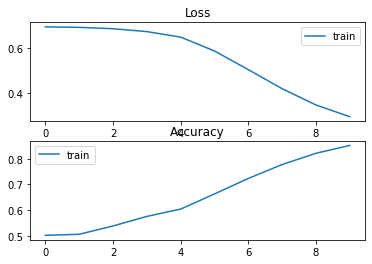

In [32]:
train_acc = model2.evaluate([X,Y],y, verbose=0)
#_, test_acc = model.evaluate(testX, testy, verbose=0)
train_acc
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
#pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
#pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [33]:
m=[]
for i in pred:
    if(i>0.5):
        m.append(1)
    else:
        m.append(0)

In [69]:
#print(m)

In [72]:
predict_array=np.concatenate((zg,z0,z1,z2,z3,z4,z5,z6,z7,z8),axis=1)
predict_array[4]


array([0.8721351 , 0.5656379 , 0.90317446, 0.76825535, 0.7411063 ,
       0.9303931 , 0.7740432 , 0.8776292 , 0.8800665 , 0.7070629 ],
      dtype=float32)

In [51]:
y_true=y[15000:20000]
list(y_true)
y_val=np.c_[y_true]
y_val

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

In [52]:
Y_T=pad_sequences(y_val,maxlen=10,padding='post')
Y_T

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [68]:
import tensorflow as tf
for i in range(1,11):
    o=tf.metrics.Recall(top_k=i)
    o.update_state(Y_T,predict_array)
    print(o.result().numpy())

0.0990099
0.19881187
0.29821783
0.4019802
0.49386138
0.5881188
0.6990099
0.8019802
0.8938614
1.0
